Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **44 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Alicia"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomized quicksort

## Part A. Median-of-3 partitioning quicksort 

## Question 1 [time estimate: 10 minutes]

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [2]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]

#this function finds the median of three numbers
def median(x1, x2, x3):
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1


def qsort(lst):
    indices = [(0, len(lst))] 

    while indices:
        # randomly select the index of from and to
        (frm, to) = indices.pop()
        if frm == to:  # continue the loop to select once again if the two indexes happen to be the same
            continue

        # Find the partition:
        N = to - frm    # number of items in the partition
        inds = [frm + int(N * n) for n in locations]  # get the three indices of the beginning, middle and ending data point
        values = [lst[ind] for ind in inds]  # get the corresponding value from the indices
        partition = median(*values)  # get the median number in the list of values

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])
        
        # indices
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

def randomized_quicksort():
   # create a list of elements 1, 2, 3, ... , N
    lst = [i for i in range(N)]
    # randomize the list by shuffling
    random.shuffle(lst)
    return qsort(lst)


def test_quicksort():
    # get the list returned by the above function
    lst = randomized_quicksort()
    # test whether the list is sorted
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.05423031600003014


## Question 2 [time estimate: 3 minutes]

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

The difference is that this code, the randomization happen by shuffling the list before calling the function in line 52 and it is using comparisons, where Comen et al uses another method which is randomly choose a number from the list as the pivot number. 

## Question 3 [time estimate: 10 minutes]

What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

In [3]:
import time 
#Define the function that calculates the time complexity
def time_randomized_quicksort (X): 
    
    #create an empty list to add running time to
    running_time = [] 
    
     #start the time and add it to the list
    running_time.append(time.time())
    
    #call the function
    qsort(X)
    
    #add the time after calling the function to the list of running time
    running_time.append(time.time())
    running_time.append(running_time[1]-running_time[0])
    
    #Return the running for the sorting algorthim
    return running_time[2]

#a list for the inputs of x-axis
lsst = []  
#create an empty list for each input's time
qsort_time = [] 

#create the input
for a in list(range (0,3000, 10)): 
    #a list to test the input
    test_list = [] 
    single_test = []
    #add the input to the list we created
    lsst.append(a) 
    test_list = list(range(a,0,-1))
    for n in range (10):
        single_test.append (time_randomized_quicksort(test_list))
    #add the running time
    qsort_time.append (sum(single_test)/len(single_test) )

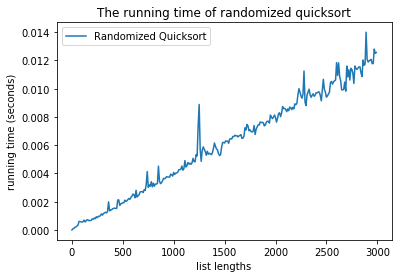

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
#plotting the graph
plt.plot(lsst,qsort_time, label="Randomized Quicksort")
plt.xlabel('list lengths')
plt.ylabel('running time (seconds)')
plt.title('The running time of randomized quicksort')

leg = plt.legend();

## Question 4.

### Question 4a [time estimate: 7 minutes]

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. In other word, you may want to put the partition in either ```lower``` or ```upper``` list instead of using ``counts`` and ```lst[ind1:ind2] = [partition] * counts``` as we did in question 1.

In [8]:
def qsort(lst):

    indices = [(0, len(lst))]
    
    
    while indices:
        # randomly select the index of from and to
        (frm, to) = indices.pop()
        if frm == to:  # continue the loop to select once again if the two indexes happen to be the same
            continue

        # Find the partition:
        N = to - frm    # number of items in the partition
        inds = [frm + int(N * n) for n in locations]  # get the three indices of the beginning, middle and ending data point
        values = [lst[ind] for ind in inds]  # get the corresponding value from the indices
        partition = median(*values)  # get the median number in the list of values
        
        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        
        # indices
        ind1 = frm + len(lower)
        ind2 = to - len(upper)

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

In [9]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([4,4,2,2,1,1])==[1,1,2,2,4,4])
assert(qsort([0])==[0])

### Question 4b [time estimate: 3 minutes]

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

In [10]:
len_input = [] #Create an empty list for the length of the input
time2 = [] #Create an empty list for the time 
for a in list (range (0,3000, 10)): #create the input
    test_list = [] #test the list
    single_test = []
    len_input.append(a) #add the input to the list of input length
    test_list = list(range (a,0,-1)) #create a list for the test
    for n in range (10):
        single_test.append (time_randomized_quicksort(test_list))
        #add the running time
    time2.append(sum(single_test)/len(single_test))

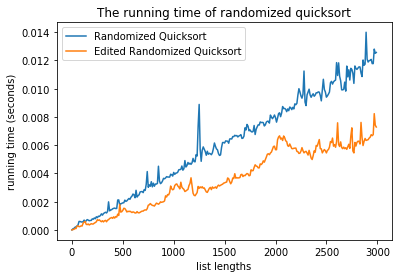

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
#plotting the graph
plt.plot(lsst,qsort_time, label="Randomized Quicksort")
plt.plot(len_input, time2, label = "Edited Randomized Quicksort") 
plt.xlabel('list lengths')
plt.ylabel('running time (seconds)')
plt.title('The running time of randomized quicksort')

leg = plt.legend();

## Question 5.

### Question 5a [time estimate: 3 minutes]

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [ ]:
def qsort(lst):
    
    indices = [(0, len(lst))]
    
    while indices:
        # randomly select the index of from and to
        (frm, to) = indices.pop()
        if frm == to:  # continue the loop to select once again if the two indexes happen to be the same
            continue

        # Find the partition:
        N = to - frm    # number of items in the partition
        inds = [frm + int(N * n) for n in locations]  # get the three indices of the beginning, middle and ending data point
        values = [lst[ind] for ind in inds]  # get the corresponding value from the indices
        partition = values[0]  # use the first number as pivot

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])
        
        # indices
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

In [ ]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b [time estimate: 3 minutes]

Does this change the running time of your algorithm? Justify your response with a graph. 



In [ ]:
len_input = [] #create a list for the input
time2 = [] #create a list for time
for a in list (range (0,1000, 10)): #create the input
    test_list = [] #a list to test the input
    single_test = []
    lsst.append(a) #add the input to the input length list
    test_list = list(range(a,0,-1)) #the list that we will test
    for n in range (10):
        single_test.append (time_randomized_quicksort (test_list))
    #add the running time
    time2.append(sum(single_test)/len(single_test))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#plotting the graph
plt.plot(lsst,qsort_time, label="Randomized Quicksort")
plt.plot(len_input, time2, label = "Edited Randomized Quicksort") 
plt.xlabel('list lengths')
plt.ylabel('running time (seconds)')
plt.title('The running time of randomized quicksort')

leg = plt.legend();

## Part B. Recursive quicksort [time estimate: 5 minutes]

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


Assuming it is not the worst case scenario, 1 + 2 + 4 + 8 + 16 + 32 + 64 + 128 + 256 = 511. This will result in a tree with height of  8 layers. Since for the lowest sublist, there will be three elements in it, so the maximum length of the list is 3 * 256 = 768.